# Welcome back to STMPY-101!#

This crash course aims to get you started analyzing STM data in Python 3 using `stmpy`. In this tutorial, you will learn what a jupyter notebooks is, how to collaborate using git repositories, install new python packages, and a bunch of other tricks I've found useful for data analysis with Python. My goal is to motivate you to *want* to use python for your next analysis task, by making it accessible and by giving you the tools to get started.  This tutorial won't bore you with a heap of basic syntax notation; that's something you can figure out as you go.  Rather, we will make sure you have an installation of python that works, give you some tools to handle STM data, and show you a few tricks that I've learned which make Jupyter notebooks a good environment for data analysis.  Mostly, we'll do this by walking through three analysis projects and hopefully we'll pick up some syntax as we go.

A resource that I find really helpful for learning python are the [video tutorials](https://training.enthought.com) offered by enthought canopy.  They are free for anyone with an .edu email address! Some other useful resources for learning the Python language and syntax are [Learn Python the Hard Way](http://learnpythonthehardway.org/book/) and [Code Academy](https://www.codecademy.com/learn/python).

## Outline ##
---



1. What is Python?
2. Installing python to your machine.
3. **First project:** Load and plot STM data.
4. The `Stmpy` workflow
5. **Second project:** Remove piezo drift from SXM topography.
6. Tips for jupyter notebooks
7. **Third project:** Plot a linecut through a FT-DOS map to visualize QPI.
8. **Fourth project:** Charge oscillations

## 1. What is Python?##

 ---


Python is an object-oriented programming language, which runs a prompt similar to MATLAB. Unlike lower-level languages, programs written in python do not need to be compiled to run.  Python is designed to be a visual language, it looks neat and efficient when coded properly. It's syntax make python cleaner than other many languages, but can catch-out first time users.  

Most importantly: white space **matters**! In Python, you tell the interpreter what lines of code are related by their indent level. For example a `for` loop in python is written as:
```python
for ix in range(2):
    print('hello') #print 'hello' 3 times
print('world!') #print 'world!' once
```
Notice that there is no need to tell the interpreter to end the `for` loop: it will only loop lines of code that are sequential and indented equally.

---

**Exercise 1.1** — Print `Hello` three times and then print `world!`. But capitalize only the first `Hello`.

---

### Python 2.7x or Python 3.x?###

In 2008 python released version 3.0, which is the first version to not be backwards compatible.  As a result, two versions of python now exist: 2.7 (last release 2010) and 3.x (latest is 3.8, released in 2019).  Most packages you will need have already been written to work with 3.x, although 2.7 still has an active user base. Python 3.x is the future of the language, so make sure you don't download 2.7 by mistake!

All that being said, for practical purposes the differences between 2.7x and 3.x is really small!  So don't panic if you've started with 2.7x and are worried about switching to 3.x: you won't have to learn a whole new language, and should just be able to tweak you code a bit.  For example, the biggest changes that users report is changing print from a statement to a command: 
 
In Python 2.7x print is a statement, so you can write:
```python
print 'Hello World!'
```
But in Python 3.x we need parenthesis so that we call the print function:
```python
print('Hello World!')
```
Other changes in Python 3.x that I've encountered include:
 - Strings are unicode by default.
 - You can use extended unpacking on tuples: `a,*b = (1,2,3)`
 - The `range()` command returns an iterable, not a list.

### Installing Python on your machine ##

#### The Anaconda distribution


For beginning users, I recommend the **Anaconda** distribution of python.  A distribution contains the python language as well as commonly used packages and an integrated development environment (IDE) so that you can get started writing scripts straight away.  Anaconda also takes care of keeping python up-to-date, and has jupyter notebooks built in.  

You can download the latest version of Anaconda from https://www.continuum.io/downloads.  Make sure you install Python 3.5.  Once installed, you should be able to launch a Jupyter notebook from within Anaconda.

The installation is around 1.8GB in total, so for those who prefer a slimmer installation...`


#### Manual installation 

On OSX (I'm assuming there is a similar method for Windows) python can be easily installed and maintained with [homebrew](http://brew.sh), or from the [source code](https://www.python.org) (slightly more tricky). I use homebrew, so python is installed using the terminal command:
> `brew install python3`

Once python is installed the accompanying package manager `pip3` can complete the distribution.  In particular you should run:
> `pip3 install --upgrade pip`

>`pip3 install jupyter scipy matplotlib`

Once installed you should be able to launch a jupyter notebook from the terminal:
>`jupyter notebook`

### Jupyter and IPython ###


Okay, *Jupyter, IPython, python, scipy, ...* **what's going on?!**

Don't panic! Python is a pretty bare language by itself: most of it's power in data analysis comes from 3rd-party, open-source packages.  These are just other people's python code which you can use. Some of the most basic packages you'll use are:
- **Jupyter** is an html notebook that combines code with formatted markdown, and html-ish typesetting language. It's what this tutorial is written with, and it's similar to mathematica notebooks, if you've encountered them. Jupyer notebooks are great for data analysis as they keep track of your results and allow you to document your thought process in one place.  However, a jupyter notebook is just a client.  It doesn't have to run python code; it could run R or several other programming language.  In fact, every Jupyter notebook runs on a kernel, which you can see explicitly within Anaconda. 
- **IPython** is the kernel that we use to run python in jupyter!  It stands for *Interactive*-Python and is an extension of the python language that provides: 
  - in-line plots: in python you usually have to call a `show()` method every time you want to see a plot.  IPython shows outputs just below the cell. 
  - tab auto-completion: this helps to fill in long variable names or see available attributes for an object: just try 
  ```python
  myList = [1,2,3]
  ```
  `myList.`"tab" to see a list of available operations on `myList`.
  - magic commands: these are useful functions that are prefaced by the `%` symbol.  Some examples are:
  
    ` %pylab inline` - populates local namespace with numpy and pylab variables
    ` %cd /Users/Harry/Desktop` - change current directory to my desktop.
    ` %store myList` - save a variable from the namespace to be accessed by other ipython kernels.
    
<img src="img/Python Hierarchy.png" alt="drawing" width="70%"/>

## 2. Getting started in Python ##
---

### Importing packages ###


In python, code is organized into libraries, which comprise of modules that are loaded into a current session using the `import` command.  One of the most useful packages for data crunching is `numpy`, which gives you access to $n$-dimensional arrays and a bunch of numeric functions like `sin` and `exp`.  For scientific computing, especially optimization and curve fitting, the `scipy` package contains some useful functions.  Along with the plotting library `matplotlib`, these packages are the bulk of the python [scientific stack](https://www.scipy.org/stackspec.html).  In python, we can load these packages into the current session using:
```python
import numpy as np
import scipy
import matplotlib as mpl
import pylab as plt
```
You can also import a specific part of a package using the `from ... import ...` syntax to save time importing the whole thing.  This is usually done for parts of `scipy`.  Here I'm loading a general non-linear optimization algorithm, which I can then call directly.

```python
from scipy.optimize import minimize
```

Now that we have these packages imported, we can access their functions by writing the package name (or our chosen name) followed by a dot. So to create and plot a numpy array we would write:
```python 
myArray = np.array([1,2,3])
plt.plot(myArray)
plt.show()
```

---

**Exercise 2.1** — Plot $sin(x)$ from $x=0$ to $x= 2\pi$

---

For commonly used packages such as numpy and matplotlib, it can get tedious to keep having to preface the package name every time we want to use it.  Fortunately, we can import the contents of any package to the local namespace using the command:
```python
from numpy import *
myArray = array([1,2,3])
```

In **IPython** (and jupyter notebooks) we can use a *magic* command to load the commonly used parts of matplotlib and numpy directly to the namespace. That way, we don't need to preface commonly used commands with their package names. So `np.sin()` becomes simply `sin()`, which is great if we're using `sin()` a lot.  Most of my notebooks start with this command:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 3. First project: plotting data from an NVI file
---


As an example, we are going to import an NVI (NISTview image) file to our ipython notebook and plot the data.  I've placed the NVI file and a script to import it on the `FAS` server.  First copy the tutorial directory containing the files to your local machine.
> `/hoffmanlab/Software/Python/Tutorial`

In IPython we can switch directories easily using the magic command `%cd`. Let's navigate to that directory now:

In [2]:
%cd ~/Desktop/Tutorial

/Users/Harry/Desktop/Tutorial


If you frequently need to switch to a directory with a long name, you can set up a bookmark in IPython using the magic command `%bookmark <name>`, from within the directory.  Then you can use `%cd <name>` to jump to that directory from anywhere.  

Let's start by importing the `read_nvi.py` file into our session. **Note:** you don't need to add the `.py` when importing packages.

In [3]:
import read_nvi

The `read_nvi.py` script has a function called `load_nvi` which we can access with `read_nvi.load_nvi(filePath)`.  It will open the NVI file specified by `filePath` and return an object that contains the header information and data within the file.  Let's load the file into a variable called `FeSe`:

In [4]:
FeSe = read_nvi.load_nvi('FeSe_image.NVI')

Great!  We've loaded the contents of the file and have them available to us as attributes of the variable `FeSe`.  To see all of the attributes that any object has we can use tab auto-completion in IPython.  Just do `FeSe.<tab>` and you should see a list pop up:
- `FeSe.data`
- `FeSe.header`
- `FeSe.info`
- `FeSe.raw`

The `FeSe.info` variable contains a bunch of useful experimental parameters that can tell us about the data.  `FeSe.header` is similar, but contains more information.  `FeSe.raw` contains the complete contents of the file, but the variable we are interested in is `FeSe.data`.  Let's plot that now.  Because we have `pylab` loaded into the session, this is accomplished by just one command:

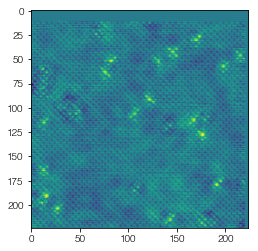

In [5]:
imshow(FeSe.data)

Usually we want to adjust various plotting parameters before saving a figure for a presentation.  A good reference for this are the examples on http://matplotlib.org.  Here I'll show you some basic operations to make this figure more presentable.

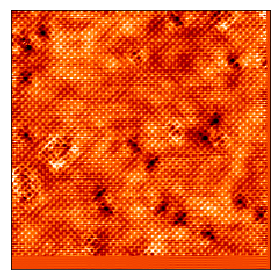

In [6]:
# We want a square figure. Let's make it 4 inches by 4 inches
figure(figsize=[4,4])    

# Turn off the x and y ticks. gca() = get current axis
gca().set_xticks([])    
gca().set_yticks([])


imshow(FeSe.data, cmap=cm.gist_heat_r, clim=(-0.04, 0.07), origin='lower', rasterized=True)    
# cmap=cm.gist_heat_r selects an orange colormap. Check out cm.<tab> for other options! 
# clim=(-0.04, 0.07) choses the limits for the colorscale
# origin='lower' puts the (0,0) point in the lower-left corner
# rasterized=True turns off interpolation between pixels

# Make sure the figure fits tightly within the window you will save
tight_layout() 

# Always save as a vector format like pdf, eps, or svg
savefig('IMG_FeSeData.pdf')   

⭐️Congratulations!  You've made your first plot using python!  If you had wanted to save this in another format, such as raster graphics, you just need to change the desired extension.  Try:
```python
savefig('IMG_FeSeData.png')
```


## 4. The stmpy workflow
---



Like many others, I previously used MATLAB for data analysis. In my workflow, I would create functions that were stored locally and run scripts that called those functions. If I was lucky, I'd remember to comment the code in the script to describe my thought process, but more often than not, my code would end up undocumented. Sharing my analysis was difficult too, because I'd constantly tinker with the functions, but forget to update my collaborators. 

Combining jupyter notebooks with `stmpy`—an online repository for STM code developed in our lab—aims to solve these workflow issues. In a `stmpy` workflow, all analysis steps are **documented** in a jupyter notebook. Data can be easily shared after it is processed using the `stmpy` file format. Any new code that is developed is committed to the `stmpy` repository and instantly available for other users. 

In the next few sections, we will walk through installing and working with `stmpy`.



<img src="img/Stmpy workflow.png" alt="drawing" width="90%"/>

### Working collaboratively with GitHub ###


When working as a team, it's important to be able to easily share code and results so that others can follow your analysis steps.  For large projects, it quickly becomes difficult for everyone to keep an up-to-date version of the same code, without sending multiple copies by email.  One solution is to use GitHub to sync everyone's changes to a cloud-based drive (called a repository).

GitHub makes it easy to update code and to push those updates to other users.  We start by making a project, which has a master branch hosted on www.github.com.  Collaborators can `clone` the master branch onto their local machine, and make their own edits.  You can `commit` any changes and then `push` them back to the master branch to make them part of the project.  Alternatively, GitHub allows many branches to be maintained in parallel. 

To get started sign up for a free account on [GitHub](https://github.com) then follow the prompts to download the[desktop install files.  This gives you the option to install a [GUI](https://desktop.github.com) to manage repositories or to directly manage things from command line tools (I prefer to use the desktop GUI).

**Note:** You need to verify email address after creating an account.

To help you get familiar with GitHub, there is a 10-minute introductory [tutorial](https://guides.github.com/activities/hello-world/) that covers the workflow in GitHub.  If you want to use `git` from the command line the commonly used commands are:
```bash
git clone <url>    # Creates repository
git add *    # Add all changes to be committed
git commit -m "commit message"    # Commit changes (requires a message)
git push origin master    # Push changes to the master branch
git pull    # Sync your local repository with github.com
```

### Stmpy: STM-python data analysis package


Our lab's STM analysis code is a python package called `stmpy`, which is available on GitHub [here](https://github.com/harrispirie/stmpy).  If you are using GitHub Desktop, open the `stmpy` package in the app and clone the repository somewhere on your local machine. This way you can easily maintain an up-to-date version of the code and make your own contributions to the main branch.

To accomplish the same thing using the command line (on OSX), first navigate to where you would like the package to be installed then run:

```bash 
git clone https://github.com/harrispirie/stmpy
```

This repository is set up to be a python **package**, which contains a few extra bits from a bare script that allow it to be installed on your machine and called from anywhere.  Specifically, a package must contain a `setup.py` file that tells python how to install it, and a `__init__.py` file within every subdirectory.  Adding `__init__.py` to any directory will tell python that that directory is a *module* or *sub-module* that contains other `.py` scripts. 

From the first `stmpy` directory, you can install the package from the command line by typing:
```bash
python3 setup.py develop
```

Adding the `develop` keyword means that any changes you make to the contents of `stmpy` will immediately be available when you `import` it. 

Alternatively, you can use `pip3` to download and install at the same time (also works for colab environment) 
```bash
pip3 install -e git+https://github.com/harrispirie/stmpy.git#egg=stmpy
```

### Managing conflicts


Conflicts—when multiple users edit the same piece of code—are an inevitable consequence of collaborating on a large project. One solution is to use [branches](https://nvie.com/posts/a-successful-git-branching-model/) to develop code. These branches are committed to the master only when the feature under development is ready for production. 

In practice, we develop code at a relatively slow pace, so it's rare that two people will be editing the same script at the same time (even though >50% of `stmpy` code is in one script called `stmpy.tools`...). Most of the conflicts I've encountered can be resolved by using the following model to develop code (usually a new analysis tool). 
1. Create and test your code in a local jupyter notebook without modifying `stmpy` source code. When the function operates as intended, you're ready to commit to `stmpy`. 
2. Update your local `stmpy` repository to match the master branch using `git pull origin master`. Note that `git pull` will integrate master branch changes to your local repository, and will manipulated any uncommitted changes. 
3. Rewrite the final version of your function in the `stmpy` source code (usually in `stmpy.tools`). Source code in `stmpy` doesn't import the namespace of matplotlib, numpy, or scipy, so if your code calls any of those functions, they will need an appropriate prefix, such as `mpl.` or `np.`. We try hard to avoid importing `matplotlib`, `numpy`, and `scipy` functions directly in `stmpy` source code so that tab auto complete shows a list of `stmpy` functions that is uncluttered by `numpy` functions, and so on. 
4. Test your new function by restarting the Kernel to get an updated import of `stmpy`, then running the new code (usually in `stmpy.tools.<new function>`).
5. Fix any bugs. 
6. Commit your code to `stmpy` and add an informative message using `git commit -m "commit message"`. 
7. Push your changes to the master repository with `git push origin master`. 

##  5. Second project: correcting for piezo drift
---


Now that you have installed the stmpy package, you should be able to `import` it into any python session, without having to work in the directory that contains the source code.  Let's try that now, in a new notebook that can be wherever you will your analysis (usually not the same location as your local `stmpy` repository).

In [7]:
import stmpy

To see the contents of any package you can use the tab auto completion.  Here from the list `stmpy.<tab>`, the most useful functions are:
- `stmpy.load`: loads Nanonis(`.3ds`, `.sxm` and `.dat`) and NISTView (`.nvi` and `nvl`) data types.
- `stmpy.save`: saves any data type in a `.spy` file format that can be read by `stmpy.load`
- `stmpy.tools`: contains basic analysis tools, including `fft()`, `linecut()`, `lineSubtract()`, `curve_fit()`, and many more. You can see complete list using `stmpy.tools.<tab>`
- `stmpy.image`: contain tools that make it easier to plot images, including `add_cbar()`, `write_animation()`, and `add_scale_bar()`.
- `stmpy.cm`: An extension to matplotlib colormaps to include common STM colormaps like `blue2`, `defect0`, `yanghe`, and many more!
- `stmpy.drift`: Python implementation of the Lawler-Fujita drift correction algorithm

Let's demonstrate some of the functionality now by opening a topography file straight from Nanonis:

In [8]:
# Let's call the data something short because we're going to type it a lot, like "fe"
fe = stmpy.load('FeSe_topography.sxm')

The load function returns a python object, which has the data stored as one of its attributes (remember: you can use tab auto-completion to see a list of attributes for any object).  In this case the `.sxm` file has 8 channels of data recorded, with a forward and backward scan direction for each of: topography, current, LIY 1, LIY n.  Information about the scan conditions are stored under `fe.header`.  

Let's take a look at the topography channel, which can be accessed by `fe.channels['Z_Fwd']` or by using the shortcut `fe.Z`. 

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


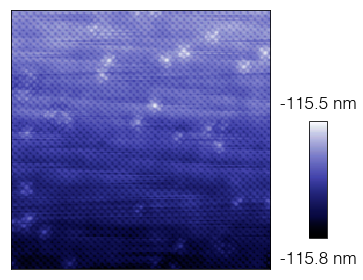

In [9]:
figure(figsize=[4,4])
ax = subplot(111) # Explicity get an axis handle, rather than rely on gca()
imshow(fe.Z*1e9, cmap=stmpy.cm.blue2, origin='lower', rasterized=True)
ax.set_xticks([])
ax.set_yticks([])

# Add a color bar in units of nm, with one significant figure. 
# Increase pad to push the colorbar away from the main axis.
stmpy.image.add_cbar(units='nm', sf=1, pad=0.15)

tight_layout()

There are two aspects of the data that we'd like to improve. First, it's clear that there was a significant piezo drift in the `Z` height as the scan was taken, which we'd like to remove. Second, the scan height is always around -115 nm, which was the extension of the piezo at the time, but makes it hard to see the relative distances. We can actually do both of these tasks simultaneously by setting the mean of each horizontal line in the data to zero, for example with `line - mean(line)`.  To correct a 2D image, we need to run `line - mean(line)` on every row in our image. 

Let's start by preallocating space: we know that the corrected image will have the same dimensions as the original image, so we can create an array of the same (2D) shape using the `zeros_like` command (part of the `numpy` package).

In [10]:
# Initialize the output. We'll call the corrected data fe.z with a lowercase, 
#leaving the untouched raw data with an uppercase letter. 
fe.z = zeros_like(fe.Z)

Now we want to iterate over every row in our image and fill in the corresponding row in the `fe.z` variable. We can do this using a `for` loop.  Here's our first real glimpse of python syntax, which I want to explain to you by comparing with a `for` loop in MATLAB (feel free to skip if you're already familiar with python `for` loops). 

As a simple example, let's suppose that we want to print out every element in an array:
```python
myArray = array([5,3,2])
```

In MATLAB, you could acomplish this with the following `for` loop:
```
for ix = 1:numel(myArray)
    disp(myArray(ix))
end
```
Here we loop over an index and use that index to look up the corresponding value.  In python we do this more directly my looping over _the elements_ of the array:
```python
for value in myArray:
    print(value)
```
There are a couple of other syntax changes here too: the ':' tells python to expect an indented block of code and we don't need to end the `for` loop because we have used indentation (as described earlier).  

But sometimes it's useful to know the iteration number (`ix`) in python as we loop.  We can return *both* the array value and the iteration value using the `enumerate()` command:
```python
for ix, value in enumerate(myArray):
    print(value)
    print(myArray[ix])
```
Both `print` statements here have the same output.  Also, in python we use square brackets to index an array; indexing starts from zero.

In our example we want to loop over every row in the 2D matrix `fe.Z` and write our result to the corresponding row in `fe.z`, so this is one of the times where it can be useful to use `enumerate()` to return an index and a value for every iteration. The code looks like this:

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


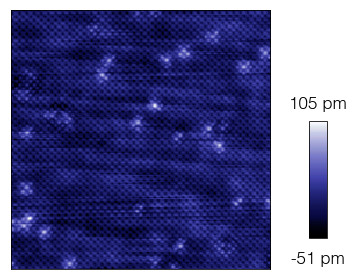

In [11]:
# Iterate though the last axis of fe.Z
for ix, line in enumerate(fe.Z):
    fe.z[ix] = line - mean(line)

# Multiply everything by 1e12 to get units of pm
fe.z *= 1e12 
    
# Plot the result
figure(figsize=[4,4])
ax = subplot(111)
imshow(fe.z, cmap=stmpy.cm.blue2, origin='lower', rasterized=True)
ax.set_xticks([])
ax.set_yticks([])
stmpy.image.add_cbar(units='pm', sf=0, pad=0.15)
tight_layout()

That looks much better!

We actually could have achieved the same thing without a `for` loop line by using numpy's `mean()` function to return the mean of our 2D image *along a specific axis*, in this case along the vertical axis (`axis=1`). To subtract this array of mean values from the vertical axis of our image, we first need to transpose `fe.Z`. For any numpy array `a`, the transpose is stored as an attribute called `a.T`.

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


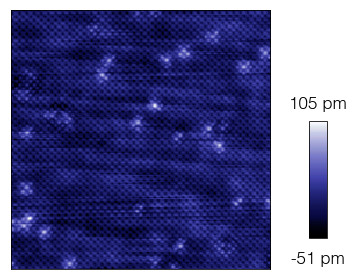

In [12]:
zTranspose = fe.Z.T - mean(fe.Z, axis=1)
fe.z = zTranspose.T*1e12

figure(figsize=[4,4])
ax = subplot(111)
imshow(fe.z, cmap=stmpy.cm.blue2, origin='lower', rasterized=True)
ax.set_xticks([])
ax.set_yticks([])
stmpy.image.add_cbar(units='pm', sf=0, pad=0.15)
tight_layout()

---

**Exercise 5.1**—Subtract the mean value along the horizontal axis _after_ subtracting the mean value from the vertical axis (using either method from above). 

---

Now let's see if we can do a little better by subtracting a polynomial fit to each line, instead of the mean value. We'll use a numpy function called `polyfit` to find the fitted polynomial coefficients using a least squares analysis. To learn the syntax of the `polyfit` function, we need to look at it's doc string. The doc string is an important part of how we interact with functions in python—it's contained within a special attribute called `__doc__`. We can access it by using the python function `help()`

In [13]:
help(polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

Alternatively (and quicker), in IPython, we can use `<shift+tab>` to access the doc string, by pressing `polyfit.<shift+tab>`. This method works in a similar way to how we use `<tab>` to auto complete functions. Pressing `<shift+tab>` once will bring up the doc string header, and pressing it a second time will show the whole doc string. 

The first part of the doc string tells us most of what we need to know: 
```
polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
```

But I also like to check what the function returns, which is written further down. 
```
    Returns
    -------
    p : ndarray, shape (deg + 1,) or (deg + 1, K)
        Polynomial coefficients, highest power first.  If `y` was 2-D, the
        coefficients for `k`-th data set are in ``p[:,k]``.
```

Ok, so the highest power coefficient is first. 

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


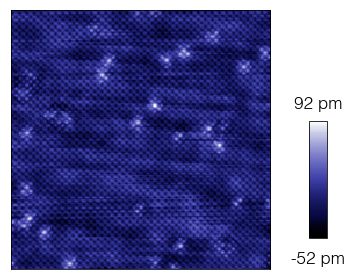

In [14]:
fe.z = zeros_like(fe.Z)

# We need x values in our polyfit function. The numbers don't matter, 
# but the shape must be the same size as the y-axis of fe.Z, which
# is contained in fe.Z.shape[1]
x = linspace(0, 1, fe.Z.shape[1])

for ix, line in enumerate(fe.Z):
    # fit a second-order polynomial (a quadratic) to each line
    p = polyfit(x, line, 2)
    # now evaluate the polynomial and subrtract from original line
    fe.z[ix] = line - polyval(p,x)

fe.z *= 1e12 

figure(figsize=[4,4])
ax = subplot(111)
imshow(fe.z, cmap=stmpy.cm.blue2, origin='lower', rasterized=True)
ax.set_xticks([])
ax.set_yticks([])
stmpy.image.add_cbar(units='pm', sf=0, pad=0.15)
tight_layout()

We will probably want to subtract a polynomial background often, so it makes sense to rewrite our code above as a function. Let's call the function `lineSubtract()`. To make it usable by others we will add a doc string, which occurs in the line immediately following the function definition. All doc strings in `stmpy` should have the same four sections:
1. A brief description of the purpose of the function
2. A list of all function inputs, their type (array, integer, float...), and whether they are optional (called a keyword argument) or not. Optional arguments have predetermined initial values, in this case we make `n`, the degree of polynomial, an optional argument and set it to 2 by default. 
3. A list of what the function returns. 
4. History of modifications to the function, useful for backwards compatibility and debugging.

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


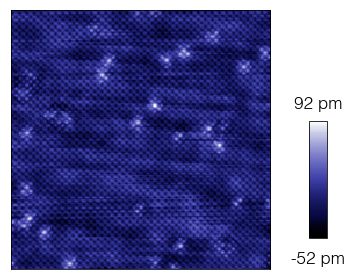

In [15]:
# Our function has 2 inputs: a 2D array of data points and the polynomial order, n. 
def lineSubtract(data, n=2):
    '''Remove a polynomial from each horizontal line in the data
    
    Inputs:
        data    - Required : 2D array containing topographic data.
        n       - Optional : integer for degree of polynomial to remove.

    Returns:
        out     - Numpy 2D array with polynomial removed

    History:
        2020-05-20  - HP : Initial version.
    '''
    out = zeros_like(data)
    x = linspace(0, 1, data.shape[1])
    for ix, line in enumerate(data):
        p = polyfit(x, line, 2)
        out[ix] = line - polyval(p,x)
    return out

# Now let's use this function 
fe.z = lineSubtract(fe.Z)*1e12

# Sometimes it's helpful to put two related functions on the same line, 
# by separating them with a ';' 
figure(figsize=[4,4]); ax = subplot(111)
imshow(fe.z, cmap=stmpy.cm.blue2, origin='lower', rasterized=True)
ax.set_xticks([]); ax.set_yticks([])
stmpy.image.add_cbar(units='pm', sf=0, pad=0.15)
tight_layout()

To share this function, or to have it be available automatically in every notebook, we could commit it to `stmpy`. To do so, we first need to change all the numpy functions to have the prefix `np.` because numpy functions are not in the namespace of `stmpy`. For example, `polyfit()` would change to `np.polyfit()`. Our linecut function belongs in the module `tools.py`, so that it is loaded as`stmpy.tools.lineSubtract()`. 

Actually, there's already a `lineSubtract` tool included with `stmpy`! Navigate to your local `stmpy`, open `tools.py` and see if you can find it (line 229). 

The `stmpy.tools.lineSubtract()` tools does basically the same as our `lineSubtract()` function above, but it's more general and can handle 3D, 2D, or 1D data. It can also mask large impurites which would otherwise appear to have 'shadows' after subtracting. Learn about its other features by typing `stmpy.tools.lineSubtract.<shift+tab>`.

Let's see how it applies to our example. 

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


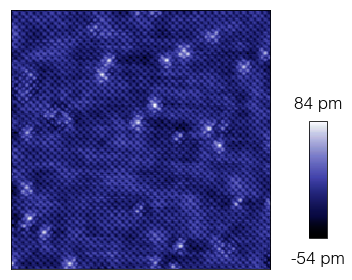

In [16]:
fe.z = stmpy.tools.lineSubtract(fe.Z, n=4, maskon=True)*1e12

figure(figsize=[4,4]); ax = subplot(111)
imshow(fe.z, cmap=stmpy.cm.blue2, origin='lower', rasterized=True)
ax.set_xticks([]); ax.set_yticks([])
stmpy.image.add_cbar(units='pm', sf=0, pad=0.15)
tight_layout()

This tool nicely removes the `Z` piezo drift in the original data. In fact, it removes _any_ signal that has purely a $y$-axis periodicity! If there was interesting physics happening in the $y$ direction, it's gone!

We can see this affect by looking at the Fourier transforms before and after the subtraction.

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


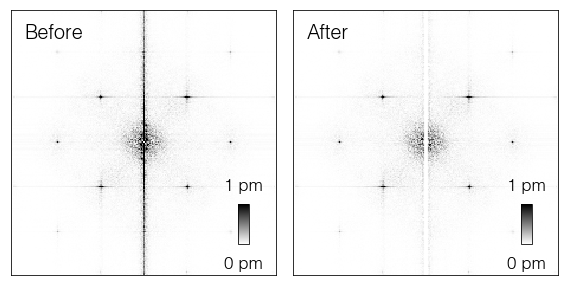

In [17]:
# Let's create a new variable to store the Fourier transform that is 
# the old variable name then the letter f. 
fe.Zf = stmpy.tools.fft(fe.Z, zeroDC=True, units='amplitude')*1e12
# zeroDC=True is the same as fft(fe.Z-mean(fe.Z)), which removes the 
# -115 nm position of the Z piezo that would otherwise dominate. 
# units=amplitude means that if the height of an atom is 20 pm, the 
# intensity of the Bragg peak will be 10 pm because there is a positive 
# and negative Bragg peak. 

fe.zf = stmpy.tools.fft(fe.z, zeroDC=True, units='amplitude')

# To get two subplots side-by-side, use the subplots function.
# It returns a numpy array, but each element is an axis instance.
fig, ax = subplots(1, 2, figsize=[8,4])
ax[0].imshow(fe.Zf, cmap=stmpy.cm.gray_r, clim=(0,1), origin='lower', rasterized=True)
ax[1].imshow(fe.zf, cmap=stmpy.cm.gray_r, clim=(0,1), origin='lower', rasterized=True)

# Add a label on each plot
stmpy.image.add_label('Before', ax=ax[0], loc=1)
stmpy.image.add_label('After', ax=ax[1], loc=1)

# We can easily iterate through both axes using a for loop
for a in ax:
    stmpy.image.add_cbar(ax=a, length='15%', thickness='4%', sf=0, pad=-0.14, units='pm')
    a.set_xticks([])
    a.set_yticks([])
tight_layout()

If you look closely, there is a Bragg peak harmonic along the vertical, which is completely eliminated by the background subtraction. We threw the baby out with the bathwater! Depending on our goal, this error could prove problematic or completely harmless. 

---

**Exercise 5.2**—In practice, the $z$ piezo drift is reasonably accurately described by a [logistic function](https://en.wikipedia.org/wiki/Logistic_function):
$$f(t) = \frac{Z_f}{1+e^{-k(t-t_0)}} +c,$$
where $Z_f$ describes the tip's final resting height at $t=\infty$, $k$ is the logistic growth rate (how quickly it reaches $Z_f$), $t_0$ is the midpoint, and $c$ is an arbitrary constant. Use `stmpy.tools.curve_fit()` to remove a logistic function describing piezo drift from `fe.Z` while retaining the harmonic Bragg peak.   

_Hint 1: Piezo drift occurs only along the slow scan direction._

_Hint 2: Fitting algorithms works best if the data values are reasonably large, about 1-100 rather than 1⨉10$^{-7}$. Often, failed fits need only a different choice of units to succeed._

---

## 6. Advanced tips ##
--- 


Jupyter notebooks offer a clean place to record your analysis as it progresses. The notebook is comprised of cells, which can be executed as code or converted to markdown by pressing `Esc` then `m` (or by selecting markdown from the `Cell/Cell Type` drop-down menu).  Markdown is a typesetting language that allows you to input math in latex notation and format text using simple commands.  A helpful reference for markdown syntax can be found [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet), or alternatively, double-click any cell in this notebook to see its raw markdown input.

I want to demonstrate some of the tricks I've learned whilst analyzing data in jupyter notebooks that have made things much easier.

#### 1. Using multiple cursors to edit code 


I found this incredibly useful trick completely by accident, but I now use it all the time. If you hold down `command` (presumably `ctrl` on windows) then click somewhere in a cell, you will generate another cursor at that point.  There appears to be *no limit* to the number of cursors you can have at once!  I find this really useful for changing variable names or by simultaneously changing a bunch of values at the same time.
Additionally if you hold down `Option/Alt` then click and drag across multiple lines, you get a new cursor in the same place of each line. 


#### 2. PEP-8 helps us work together 



You might not know it, but a great deal of thought has been given to python's underlying design principles. The result is a language that is both elegant and efficient, and has a large emphasis on readability. These design principles are part of it's success. By making a programming language read more similarly to natural language, more people understand the code. In turn, this makes collaborating easier, as your peers can see what you're trying to achieve without you needing to explain it. 

The philosophy behind the python language is captured neatly by `this`—twenty lines of text important enough to be bundled with the base python language. See for yourself:

In [18]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


All of the basic syntactic mannerisms that adhere to the zen of python are neatly summarized in [PEP 8—the style guide for python code](https://www.python.org/dev/peps/pep-0008/). It takes 20 minutes or so to read, but it is vital for collaborating on a large python project, such as `stmpy`. 

I **highly recommend** reading, and generally adhering to the guidelines in PEP 8. 

Here are some _highlights_:
1. Avoid whitespace immediately inside parentheses
```python
# Correct:
spam(ham[1], {eggs: 2})
# Wrong:
spam( ham[ 1 ], { eggs: 2 } )
```
However, in a slice the colon acts like a binary operator, and should have equal amounts on either side (treating it as the operator with the lowest priority). In an extended slice, both colons must have the same amount of spacing applied. Exception: when a slice parameter is omitted, the space is omitted:
```python
# Correct:
ham[1:9], ham[1:9:3], ham[:9:3], ham[1::3], ham[1:9:]
ham[lower:upper], ham[lower:upper:], ham[lower::step]
ham[lower+offset : upper+offset]
ham[: upper_fn(x) : step_fn(x)], ham[:: step_fn(x)]
ham[lower + offset : upper + offset]
# Wrong:
ham[lower + offset:upper + offset]
ham[1: 9], ham[1 :9], ham[1:9 :3]
ham[lower : : upper]
ham[ : upper]
```
2. Don't use spaces around the `=` sign when used to indicate a keyword argument, or when used to indicate a default value for an unannotated function parameter:
```python
# Correct:
def complex(real, imag=0.0):
    return magic(r=real, i=imag)
# Wrong:
def complex(real, imag = 0.0):
    return magic(r = real, i = imag)
```

#### 3. Customize your interface and add functionality

Jupyter is a fairly bare-bones interface, straight out of the box. Partly due to this simplicity, it is extremely flexible and powerful. Jupyter can run python, markdown, R, even shell commands—just prefix them with a `!`.  Try some of your favorite bash commands, right from the cell: 

In [19]:
!ls

FeSe_image.NVI       IMG_FeSeData.pdf     Thin.mplstyle
FeSe_topography.sxm  PYTHON 101.ipynb     __pycache__
GillSans-Light.ttf   PYTHON+101.html      helvetica.ttf
Helvetica-Light.ttf  Python Hierarchy.png read_nvi.py
IMG_Ex7-1.png        SmB6_DOSmap.3ds      small.mplstyle


Because it runs html in the background, it's straight forward to change the appearance of your jupyter notebook using ordinary CSS. Or if you prefer, you can install a pip package called [jupyterthemes](https://github.com/dunovank/jupyter-themes) that gives you several new themes to choose from. 

You can install the package from the command line, or even from this notebook!

```bash
pip3 install --upgrade jupyterthemes
```

Then run `jt -l` to see the available themes, and `jt -t grade3 -cellw 80%` to get the theme I'm using here.

These themes modify the `custom.css` file that jupyter reads. Or, you can manually modify it yourself. On OSX, it's located in `~/.jupyter/custom/custom.css`. For example, adding the following lines of code to the top of the `custom.css` style sheet will center all of your plots in the jupyter notebook: 

```css
div.output_png img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
```

Many other extensions, like tables of contents or automatic cell timing, are available using [notebook extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/). The most useful amongst these are surely collapsible headings, which allow you to quickly collapse sections of your notebook that you aren't actively working on. Install `nbextensions` using
```bash
!pip3 install jupyter_contrib_nbextensions && jupyter contrib nbextension install 
```
Then start a jupyter notebook and navigate to the `Nbextensions` tab.  For more tips on jupyter notebooks, I recommend [this blog post](https://towardsdatascience.com/bringing-the-best-out-of-jupyter-notebooks-for-data-science-f0871519ca29).

Heck, you can even browse the web from your humble jupyter notebook. 


In [20]:
from IPython.display import IFrame
IFrame('http://www.nytimes.com', width=800, height=450)

#### 4. Installing new fonts


If you're making a figure for a paper, you probably want all of your plot labels and annotations to have the same font, and a consistent font size. At least, I certainly do! Currently, I use Helvetica Regular 6.5 pt throughout all plots. It's better to set this up once, and never think about it again. 

We can install new fonts in four steps: 

1. Find (or create) a true-type font (.ttf) file of the font you want to install.  Note that matplotlib only looks for .ttf fonts, so .ttc (True-type collection) or .dfont (Mac) files need to be converted.  They can be converted with `fondu` (`brew install fondu`) or using an online converter.  Or just use this the fonts I've already put in the Tutorial folder!


2. Move the .ttf font to a directory that matplotlib checks.  You have a few options for places that maplotlib will check for fonts: 
- `/Library/Fonts`
- `/System/Library/Fonts`
- `/usr/X11/lib/X11/Fonts`
- `$INSTALL/mpl-data/fonts/ttf`
Usually if pip was used for installation, `$INSTALL = /usr/local/lib/python3.7/site-packages/matplotlib/`.

3. Delete the cache file.  Matplotlib caches the fonts it finds (so that it doesn't have to look each time you use it) and stores the cache in the matplotlib home directory.  You can find this directory by running:
```bash
 python3 -c "import matplotlib; print(matplotlib.matplotlib_fname())"
 ```
from the command line. It will tell you the location of your matplotlibrc file (we’ll use this later). For me it is in the directory  `~/.matplotlib`.  The cache file is called `fontList.json` in python 3 (I recall that it was called `fontList.cache` for python 2). Remove the cache to force matplotlib to rebuild it next time you run it.  For example, 
```bash
rm ~/.matplotlib/fontList.json
```

4. Add the font to your rc settings.  Actually, at this point the font will be available in matplotlib, but you probably want to make it the default font either globally, or in a specific style sheet (next section).  

To make the font the global default first open your matplotlibrc file, which contains the default parameters for matplotlib.  You can find this file with: 
```bash
python3 -c "import matplotlib; print(matplotlib.matplotlib_fname())”.  
```
For me, I can open it with 
```bash
mvim ~/.matplotlib/matplotlibrc
```
Scroll down until you find the line starting with `font.sans-serif` if you installed a sans-serif font or `font.serif` if you installed a serif font.  This should be line 152 or 153.  Remove the ‘#’ and add the name of the font at the start of the list, for example,
```
font.sans-serif     : Helvetica, Gill Sans, Bitstream Vera Sans, …
```
Save the changes and restart matplotlib to install the font. 


_Known issues:_

The most recent version of matplotlib does something funny with different weights of the same font.  Let's say, I've installed Gill Sans following the above steps and made new fonts for each of the weights: Light, Bold, Normal, etc.  These fonts all have the same name "Gill Sans", so I specify which one I want using the rc parameter `font.weight`. For example in `~/.matplotlib/matplolibrc` I have, 
```
font.weight	:	light	
```
to specify Gill Sans Light.  However, the resulting plot will only have Gill Sans Light for the tick labels, but not the title or the x and y labels.   Changing `mpl.rcParams['figure.titleweight'] = ‘light’` doesn't solve this issue either.  The only way is to explicitly call it:
```python
title('Title', fontname='Gill Sans', fontweight='light')
```

My suggested work around is to delete all the other weights of Gill Sans so that it defaults to Gill Sans Light.  Just remove the files: GillSans-Bold.ttf, GillSans-BoldItalic.ttf, … 

#### 5. Using style sheets for consistent plotting 

To avoid always adding the same formatting specifications to plot commands, you can create a style sheet that contains your settings and load it once for the whole session. If you're creating a figure for a paper, your style sheet should create plots in sensible units–above we used 4⨉4 inch figures with size 17 pt labels, which is far too big in practice. Generally half-page figures should be less than 3.75 inches wide, and sub panels should be much smaller than that.

You can create your own style sheet using the guide [here](http://matplotlib.org/users/style_sheets.html), or you can use one I have made for you.  It's located in the `Tutorial` folder on the `FAS` server:
> `/hoffmanlab/Software/_Python/Tutorial/small.mplstyle`

We need to copy this into the directory that maplotlib uses to store plotting preferences.  This directory differs depending on the machine you are using, but you can find yours with:

In [21]:
matplotlib.get_configdir()

'/Users/Harry/.matplotlib'

Move the file `small.mplstyle` into the `stylelib` subdirectory (create it if it doesn't exist). Now we can load it into our ipython session.  We need to restart the kernel to reload `matplotlib`, which you can do by pressing `Esc` then double-pressing `0` (zero), or by selecting Restart Kernel from the `Kernel` drop down menu.  The style sheets are loaded with the command:

In [22]:
# You need to re-import packages after restarting the kernel
%pylab inline
%cd ~/Desktop/Tutorial
import stmpy
pylab.style.use('small')

Populating the interactive namespace from numpy and matplotlib
/Users/Harry/Desktop/Tutorial


For an unknown reason, jupyter loads a different dpi for inline figures the first time you call `pylab.style.use('small')`. So we need to call `pylab.style.use('small')` twice (apparently in separate cells). 

In [23]:
pylab.style.use('small')

Let's use `stmpy.load` to open the DOS map `SmB6_DOSmap.3ds` and take a look at the result:

In [24]:
sm = stmpy.load('SmB6_DOSmap.3ds', niceUnits=True, biasOffset=True)
# niceUnits=True converts LIY units to nS 
# biasOffset=True sets the voltage to zero when the average current is 0.
# This is helpful on metallic systems when you're not sure whether bias offset 
# was calibrated correctly prior to the measurement, but it will introduce errors
# on insulators and semiconductors where I=0 for a range of V. 

# Change energy units to meV
sm.en *= 1e3

File import successful.
Corrected for a bias offset of -0.71 meV


The `stmpy.load` function returns an object with the data as attributes.  For a DOS map, it automatically compensates for bias offset, by finding the where the current crosses zero. In this data set it has shifted all energies by -0.71 meV.  The 3ds object also includes the average dI/dV as an attribute called `sm.didv`.  Let's see what it looks like with this style sheet:

Text(0,0.5,'dI/dV (nS)')

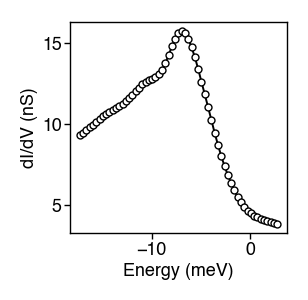

In [25]:
figure(figsize=[1.4, 1.4])
plot(sm.en, sm.didv, 'ko-', mfc='w')
# The format string 'ko-' creates black (k) circles (o) connected by solid lines (-).
# mfc='w' sets the marker face color to white (w). 
xlabel('Energy (meV)')
ylabel('dI/dV (nS)')

#### 6. Collaborating in real time

## 7. Third project: Taking a QPI linecut
---


The data set we've just loaded contains the signal of a [Dirac-like surface state](https://www.nature.com/articles/s41567-019-0700-8) that we would like to tease out of the data.  I've broken down the approach to visualize this signal into two steps:
- Compute the Fourier transform of each layer in the DOS map
- Take a linecut between the Bragg peaks in the 3D data set

This a little bit harder than our previous project because the data we are working with is 3D, but we can still use the same approach with a `for` loop.  First, we're going to start by preallocating an array to store the Fourier transform.  We know that this will be the same shape as the `LIY` data, so we can use `zeros_like` again:

In [26]:
sm.lf = zeros_like(sm.LIY)

Now let's compute the Fourier transform for each energy layer separately and assign the result to the correct space in `Sm.lf`.  To understand more about what's going on here let's look at the `shape` of the data set:

In [27]:
sm.LIY.shape

(61, 128, 128)

When we index into this data set, the first index corresponds to energy (there are 61 energy layers - you can check by running `len(sm.en)`), whereas the second and third indices correspond to the $x$ and $y$ directions.  So if we want to access just the first energy layer we use:
```python
Sm.LIY[0,:,:]
```
Here the `:` means 'everything', just like in MATLAB.  In fact, in python this it is optional to include this, and it is usually implied.  We can write:
```python 
Sm.LIY[0]
```
Which gives the same results.  If we write a `for` loop to iterate over `Sm.LIY`, it will use the first index (energy), specifically, for the `i`th iteration it will return `Sm.LIY[i]`.  This is just the `i`th energy layer, which is exactly what we want to take the Fourier transform of.

We compute the Fourier transform in 3 steps: first take the 2D FFT using `fft.fft2()` (part of the `numpy` package); then shift the origin of the 2D FFT from being in the lower left corner to being in the center using `fft.fftshift`; finally, take the `absolute` value of the FFT to return a real number. We subtract the mean before Fourier transforming to eliminate the DC component. 

In [28]:
for ix, layer in enumerate(sm.LIY):
    FT = fft.fft2(layer - mean(layer))
    FT_shift = fft.fftshift(FT)
    sm.lf[ix] = absolute(FT_shift)

Let's take a look at the result for one particular energy layer, the `-18`$^{th}$ one, which means 18$^{th}$ from the end. 

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


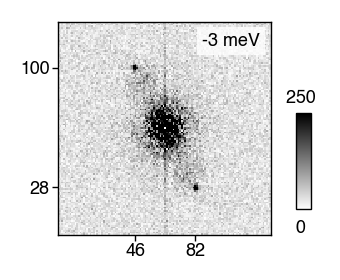

In [30]:
ax = subplot(111)
imshow(sm.lf[-18], clim=(0,250), aspect=1, cmap=stmpy.cm.gray_r, rasterized=True)
# aspect=1 makes each pixel square. We don't need origin=lower, 
# because it's already in the style sheet pylab.style.use('small')

stmpy.image.add_label('{:2.0f} meV'.format(sm.en[-18]), fs=6.5)
stmpy.image.add_cbar(fs=6.5, sf=0)
# Here we need to set the fontsize to 6.5 pt to match everything else. 
ax.set_xticks([46,82]); ax.set_yticks([28,100])
tight_layout()

Great!  The dark spots at `(46,100)` and `(82,28)` are the Bragg peaks corresponding to a $(2\times 1)$ surface reconstruction. 

In general, we need to be careful when calling a function to make sure it's compatible for the  dimensionality of data we pass to it. Fortunately, the `stmpy.tool.fft()` function can handle this 3D data set. So we can also complete the Fourier transform with just a single line, like we did earlier. 

Again, the `stmpy.tool.fft()` is more versatile that what we've coded by hand. It also allows us to window the data, which reduces finite-sized errors. It gives us the absolute value of the Fourier transform by default, but we're free to specify what we want it to return using the `output` keyword argument. 

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


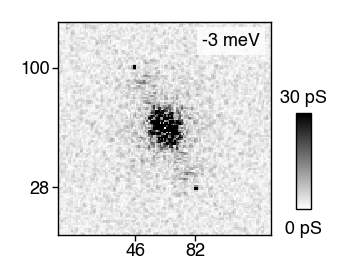

In [31]:
sm.lf = stmpy.tools.fft(sm.LIY, zeroDC=True, window='hanning', units='amplitude')*1e3
# Multipy by 1e3 to change units from nS to pS

ax = subplot(111)
imshow(sm.lf[-18], clim=(0,30), aspect=1, cmap=stmpy.cm.gray_r, rasterized=True)
stmpy.image.add_label('{:2.0f} meV'.format(sm.en[-18]), fs=6.5)
stmpy.image.add_cbar(fs=6.5, sf=0, units='pS')
ax.set_xticks([46,82]); ax.set_yticks([28,100])
tight_layout()

The signal is strongest along the Bragg direction, so we will take a linecut between the Bragg peaks.  

---

**Exercise 7.1**—Use the tool `stmpy.tools.linecut()` to take a linecut between the Bragg peaks, and plot the resulting image. 

Your image should look something like this: 
<img src="img/IMG_Ex7-1.png" alt="drawing" width="30%"/>

_Hint: `imshow` lets you supply a keyword argument `extent`, which defines your x and y range for the image._

⭐️ Congratulations! You have just demonstrated the existence of heavy Dirac fermions!

---

**Exercise 7.2**–A Fourier transform of a real quantity always has the symmetry $F(\mathbf{q}) = F(\mathbf{-q})$.  But our surface has additional 2-fold symmetry, which equates to a mirror symmetry along the line connecting the Bragg peaks. If you used the keyword argument `width` in your linecut, it will have implicitly utilized this symmetry. The symmetry increases the signal to noise ratio by $\sqrt{2}$ because the signal will increase by $2$, but the noise increases by $\sqrt{2}$ for phase incoherent sine waves. 

Symmetrize `Sm.lf` to have this 2-fold symmetry, then plot `Sm.lf[-18]`.

_Hint: You may have to [rotate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html) the image._

---


## 8. Fourth project: Discovering charge oscillations
---

In this project, you will analyze the same `sm` DOS map to search for charge oscillations. Unlike the other projects, each step will be an **Exercise** and the solution will be hidden.

An STM measures charge through local changes in the zero-bias point, that is, the voltage we need to apply to get zero current. For this project, we'll need to look at the I(V) curves that were recorded simultaneously in the DOS map `sm`. The raw data is called `sm.I`. 

The shift that we're looking for will be small, around a mV or so. So we want to zoom in on our plot so that we're only showing ± 1 mV. We could simply change the `xlim()` and `ylim()` of our plot, but here it is more convenient to plot a subset of the data. We efficiently slice any numpy array using the notation `a[start:end]`, which will return all elements of a with indices > `start` and < `end`. 

Slicing is a power way to interact with numpy arrays, for example, you can skip some elements with `a[start:stop:step]`, or you can return elements that meet a conditional: `a[a<0]` gives you all the negative elements of `a`. These slicing techniques work for multidimensional arrays too `a[start:stop,start2:stop2,0]`. 


---

**Exercise 8.1**–Use array slicing to plot a single-point $I(V)$ curve from $V = -1$ to $1$ mV. Fit a straight line to the data within this range and `print` the zero-bias point (where the fit line crosses zero). 

---

Zero bias point: 0.08 mV


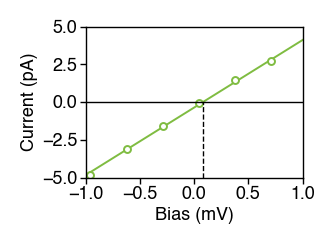

In [32]:
# Slide data and convert to pA
x, y = sm.en[-12:-5], sm.I[-12:-5,0,0]*1e12

# Fit to a 1st order polynomial 
p = polyfit(x, y, 1)

# The y=0 point for a line y=mx+c is x=-c/m
v0 = -p[1]/p[0]

figure(figsize=[1.4,1])
plot(x, polyval(p, x), '-', color=stmpy.cm.PiYG(0.8))
plot(x, y, 'o', mfc='w', mew=0.7, color=stmpy.cm.PiYG(0.8))
# mew=0.7 sets the marker edge width to 0.7

# Plot the zero current line
plot([-1,1], [0,0], 'k-', lw=0.5)

# Plot the zer0 bias line
plot([v0,v0], [-5,0], 'k--', lw=0.5)

# set tight axis limits
xlim(-1,1)
ylim(-5,5)

xlabel('Bias (mV)')
ylabel('Current (pA)')

# Create a string containing v0 to 2 dp
print('Zero bias point: {:2.2f} mV'.format(v0))

The curve that I chose at $x=0, y=0$ crosses the line $I=0$ at $V=0.08$ mV. 

Next, we have to check that the current is calibrated correctly, otherwise we might be looking at crossing at a finite $I$, which wouldn't give us charge oscillations. We need to appeal to some physics here, namely that the noise in our current data scales linearly with the amount of current. In addition, we will assume that our noise is finite even when $I=0$, and contains some current-independent contribution from the preamplifier. These two noise sources add in quadrature, so that in total, we will approximate the noise in our I(V) curves as:
$$ \sigma = \sqrt{(a|I-I_0|)^2+b^2}$$
for constants $a, b,$ and $I_0$. 

You'll later discover that there appears to be some slow, as-yet unexplained drift in $I_0$ during the scan, perhaps due to the temperature changing. So initially we just want to find $I_0$ for the first 10 rows. Let's also limit our search to the first 10 pixels in each row, so that we're calibrating on the background, away from impurities. 



---

**Exercise 8.2**–Calculate the mean and standard deviation of the current in a 10⨉10 square in the lower left corner (near the origin), using the numpy functions `mean()` and `std()`. 

---

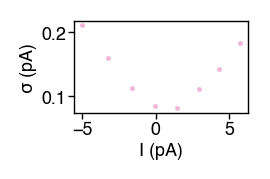

In [33]:
# Calculate the mean and standard deviation over a 10x10 square
# using array slicing. We want to calculate over the last two axes. 
# Select
sm.iv = mean(sm.I[-12:-4,:10,:10]*1e12, axis=(1,2))
sm.ivStd = std(sm.I[-12:-4,:10,:10]*1e12, axis=(1,2))

figure(figsize=[1.5,1]); ax = subplot(111)
ax.plot(sm.iv, sm.ivStd, '.', lw=0.5, color=stmpy.cm.PiYG(0.3))
ax.set_xlabel(u'I (pA)')
ax.set_ylabel(u'\u03c3 (pA)')
tight_layout()

---

**Exercise 8.3**–Fit the noise (standard deviation) vs current to the functional form above, and calculate the current offset $I_0$. Select your energy range carefully–remember that we are most interested in the behavior near $I=0$. 

---

Minimum variance current: 0.801438793 pA


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


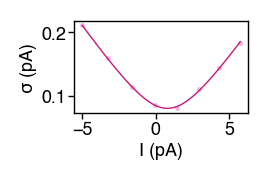

In [34]:
def sigI(I, a, I0, b):
    return sqrt(a*(I-I0)**2 + b**2)

# Fit the data to our function above
psig = stmpy.tools.curve_fit(sigI, sm.iv, sm.ivStd)

# High-resolution for plotting fit result
ivh = linspace(sm.iv[0], sm.iv[-1], 100)

figure(figsize=[1.5,1]); ax = subplot(111)
ax.plot(sm.iv, sm.ivStd, '.', lw=0.5, color=stmpy.cm.PiYG(0.3))
ax.plot(ivh, sigI(ivh, *psig), '-', lw=0.5, color=stmpy.cm.PiYG(0.1))
ax.set_xlabel(u'I (pA)')
ax.set_ylabel(u'\u03c3 (pA)')
tight_layout()
print('Minimum variance current: {:2.9f} pA'.format(psig[1]))

For the energy range that I chose, I found an offset current of $0.8$ pA. So really when we calculated the bias offset in **Exercise 8.1**, we should have looked for the intercept of the $I(V)$ curve with $0.8$ pA, not with $0$ pA. Equivalently, we could subtract 0.8 pA from every current we measure, then search for the zero-crossing point, as in **Exercise 8.1**. 


---

**Exercise 8.4**–After adjusting for the current offset found in **8.3**, create a map (called `sm.m`) of the zero-bias point for each pixel in our field of view. 

---

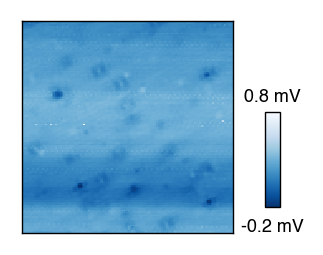

In [35]:
# We want sm.m to have the same shape as a current layer
sm.m = zeros_like(sm.I[0])

# We can use a nested for loop to iterate through pixels.
# The indices are in the order [energy, x, y]
# Subract 0.8 pA offset current
for ix in range(sm.I.shape[1]):
    for iy in range(sm.I.shape[2]):
        x, y = sm.en[-12:-5], sm.I[-12:-5,ix,iy]*1e12 - 0.8
        p = polyfit(x, y, 1)
        sm.m[ix, iy] = -p[1]/p[0]

figure(figsize=[1.4,1.4]); ax = subplot(111)
imshow(sm.m, cmap=stmpy.cm.Blues_r, aspect=1)
ax.set_xticks([]); ax.set_yticks([])
stmpy.image.add_cbar(fs=6.5, units='mV', sf=1, pad=0.15)

The code you have just written in **Exercise 8.4** is already included in the function `stmpy.tools.bias_offset_map()`—feel free to check it out!

As a last exercise, let's get rid of the pesky $I_0$ variations, without thinking too hard about where they come from. As you know, you could easily eliminate these slow variations using `stmpy.tools.lineSubtract`. But I'd like you to do it a different way, using a highpass filter. The filter is included as `stmpy.tools.highpass()`, but it accepts only 1D data. 

---

**Exercise 8.5**–Use `stmpy.tools.highpass()` with a low cutoff frequency to remove the affect of a slowly varying $I_0$ from `sm.m`. 

---

/usr/local/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


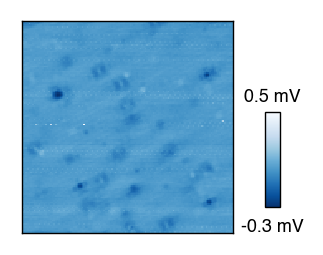

In [37]:
# As the filter accepts only 1D data, we will flatten our 2D array into 1D. 
m1D = stmpy.tools.highpass(sm.m.flatten(), ncutoff=0.001)

# Now, we can reshape the result ot be a 2D image of the original size
sm.m2 = m1D.reshape(128,128)

figure(figsize=[1.4,1.4]); ax = subplot(111)
imshow(sm.m2, cmap=stmpy.cm.Blues_r, aspect=1)
ax.set_xticks([]); ax.set_yticks([])
stmpy.image.add_cbar(fs=6.5, units='mV', sf=1, pad=0.15)

⭐️Congratulations! You've just discovered Kondo holes from their characteristic signature in charge oscillations. Compare the defect at `46,97`to this high resolution-image of charge oscillations (taken without pesky $I_0$ variations!).

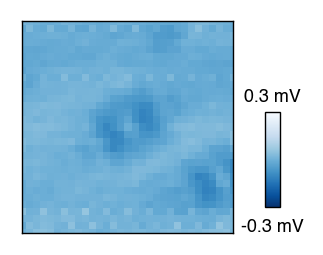

In [38]:
figure(figsize=[1.4,1.4]); ax = subplot(111)
imshow(sm.m2, cmap=stmpy.cm.Blues_r, aspect=1, clim=(-0.3,0.3))
xlim(46-15, 46+15)
ylim(97-15, 97+15)
ax.set_xticks([]); ax.set_yticks([])
stmpy.image.add_cbar(fs=6.5, units='mV', sf=1, pad=0.15)

Here's the high-res version:
<img src="img/IMG_Highres-KH.png" alt="drawing" width="45%"/>